In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split

classes = [ "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge",
           "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair","chimpanzee","clock", "cloud", "cockroach",
           "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
           "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
           "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
           "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray",
           "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
           "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
           "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
           "willow_tree", "wolf", "woman", "worm" ]

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


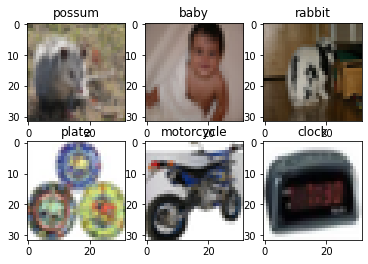

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images,val_images,train_labels,val_labels = train_test_split(train_images, train_labels, test_size = 0.2)

train_labels = train_labels.reshape(-1,)
val_labels = val_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(val_images.shape)
print(val_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [4]:
# model = ResNet50(weights='imagenet')
# model = tf.keras.models.Sequential()
# model.add(tf.keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(32,32,3),
#     pooling='max',
#     classes=100
#     ))
# for layer in model.layers:
#         layer.trainable=False 
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='Softmax'))
# model.summary()

resnet_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)
for layer in resnet_model.layers:
        layer.trainable=False 
        
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='softmax'))


In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
result=model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,validation_data = (val_images, val_labels),)



Epoch 1/10


2023-04-12 00:15:17.167867: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-04-12 00:15:21.504354: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 00:15:21.504691: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 00:15:21.504713: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-04-12 00:15:21.512007: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-12 00:15:21.512044: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


625/625 [==============================] - 82s 110ms/step - loss: 1.9697 - accuracy: 0.4843 - val_loss: 1.5000 - val_accuracy: 0.5865
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 1.3649 - accuracy: 0.6175 - val_loss: 1.3761 - val_accuracy: 0.6164
Epoch 3/10
625/625 [==============================] - 67s 108ms/step - loss: 1.2069 - accuracy: 0.6527 - val_loss: 1.3526 - val_accuracy: 0.6213
Epoch 4/10
625/625 [==============================] - 67s 108ms/step - loss: 1.1072 - accuracy: 0.6762 - val_loss: 1.3308 - val_accuracy: 0.6260
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 1.0323 - accuracy: 0.6926 - val_loss: 1.3203 - val_accuracy: 0.6328
Epoch 6/10
625/625 [==============================] - 67s 108ms/step - loss: 0.9668 - accuracy: 0.7106 - val_loss: 1.3263 - val_accuracy: 0.6372
Epoch 7/10
625/625 [==============================] - 67s 108ms/step - loss: 0.9067 - accuracy: 0.7267 - val_loss: 1.3119 - val_accuracy: 0.6

In [6]:
# test_images=test_images.reshape(224,224,3)
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 14s 86ms/step - loss: 1.3054 - accuracy: 0.6448
Accuracy :  0.6448000073432922


### Predicting 

In [7]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
# print(pred)
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print(label)
print("Prediction Class Name  : ",classes[test_labels[label]])
print("Prediction Class Label : ",test_labels[label])
print("Actual Class Name  : ",classes[test_labels[cnt]])


2023-04-12 00:26:51.476380: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6021120000 exceeds 10% of free system memory.


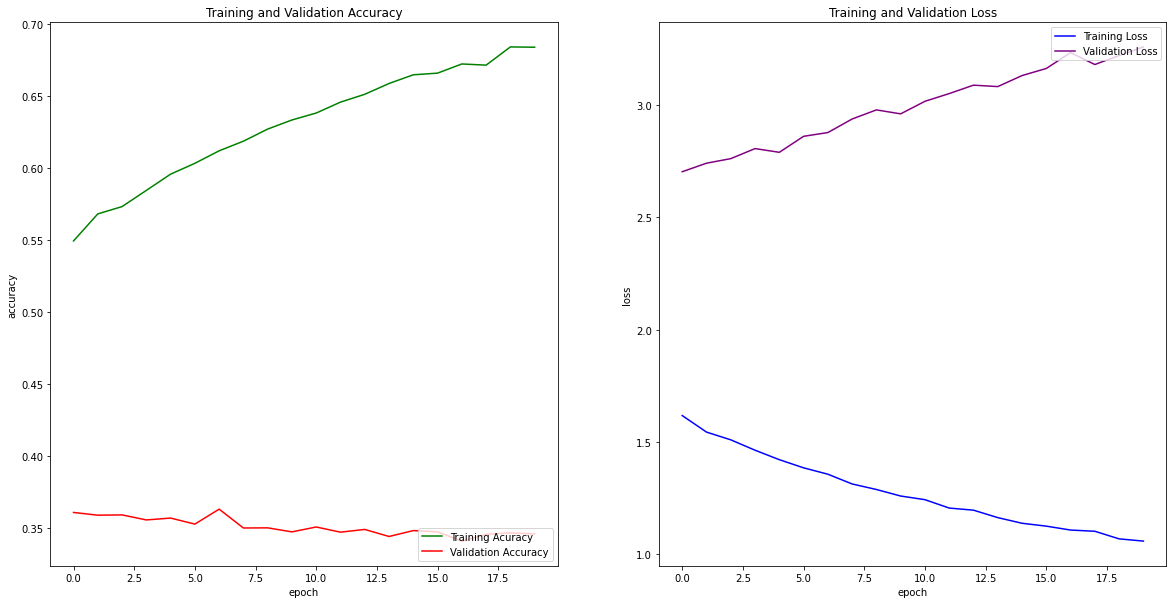

In [ ]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()


